In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from scipy.optimize import curve_fit



2023-12-10 18:26:05.194283: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import os
import pandas as pd
import numpy as np

# Adjust the data directory based on your folder structure
data_directory = 'Downloads/d 2'

# Collect all CSV files in the data directory
file_list = [os.path.join(data_directory, filename) for filename in os.listdir(data_directory) if filename.endswith('.csv')]

# Read and concatenate all CSV files
data_frames = [pd.read_csv(file, skiprows=20, header=None, names=["Time", "Torque", "Fx", "Fy", "Fz", "Extra"]) for file in file_list]
data = pd.concat(data_frames)

# Drop the "Torque" and "Extra" columns
data.drop(columns=["Extra"], inplace=True)

# Remove rows with 0 in all Fx, Fy, and Fz
#data = data[(data['Fx'] != 0) & (data['Fy'] != 0) & (data['Fz'] != 0)]

# Adding 'D' column with specified values
data['D'] = np.repeat([0.1, 0.2, 0.3, 0.4], len(data) // 4)

# Adding 'Feed' column with value 0.55
data['Feed'] = 0.55

# Adding 'Speedx' column with value 940
data['Speedx'] = 940

# Adding 'Speedy' column with value 600
data['Speedy'] = 600

# Adding 'Speedz' column with value 375
data['Speedz'] = 375

# Adding 'No. of teeth' column with a constant value of 3
data['No. of teeth'] = 3

#num_rows = len(data)
#data['rdoc'] = np.repeat(np.arange(300, 300 + num_rows // 20), 20)[:num_rows]

# Adding 'adoc' column with increasing values
#data['adoc'] = np.repeat(np.arange(500, 500 + num_rows // 20), 20)[:num_rows]
data['rdoc'] = np.repeat([300.0, 301.0, 302.0, 303.0], len(data) // 4)
data['adoc'] = np.repeat([500., 501.0, 502.0, 503.0], len(data) // 4)

# Display the modified dataframe
data



,Time,Torque,Fx,Fy,Fz,D,Feed,Speedx,Speedy,Speedz,No. of teeth,rdoc,adoc
0,0.000,-0.097656,-1.068120,-5.79834,-1.37329,0.1,0.55,940,600,375,3,300.0,500.0
1,0.001,-0.012207,-1.983640,-3.66211,-1.67847,0.1,0.55,940,600,375,3,300.0,500.0
2,0.002,-0.048828,-2.136230,-3.50952,-3.50952,0.1,0.55,940,600,375,3,300.0,500.0
3,0.003,-0.073242,-0.762939,-6.56128,-2.13623,0.1,0.55,940,600,375,3,300.0,500.0
4,0.004,-0.042725,-0.762939,-7.93457,1.37329,0.1,0.55,940,600,375,3,300.0,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44996,44.996,0.000000,0.000000,0.00000,0.00000,0.4,0.55,940,600,375,3,303.0,503.0
44997,44.997,0.000000,0.000000,0.00000,0.00000,0.4,0.55,940,600,375,3,303.0,503.0
44998,44.998,0.000000,0.000000,0.00000,0.00000,0.4,0.55,940,600,375,3,303.0,503.0
44999,44.999,0.000000,0.000000,0.00000,0.00000,0.4,0.55,940,600,375,3,303.0,503.0


1126/1126 [==============================] - 2s 1ms/step
Mean Squared Error: 10190.810894580443


Enter the value for feed:  20
Enter the value for speedx:  300
Enter the value for speedy:  400
Enter the value for speedz:  200
Enter the value for no of teeth:  4
Enter the value for rdoc:  45
Enter the value for adoc:  43


4/4 [==============================] - 0s 3ms/step


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


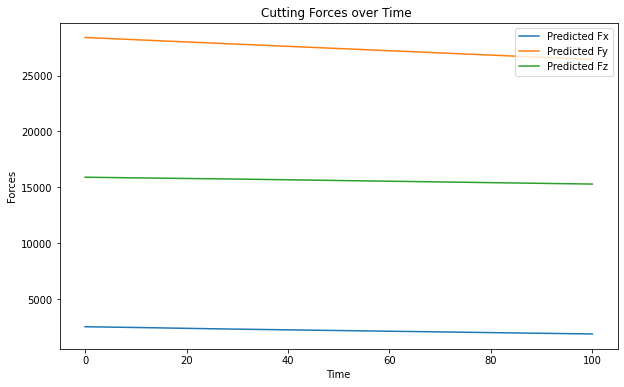

In [3]:
# Extract the relevant features and labels
X = data[['Time', 'D', 'Feed', 'Speedx','Speedy','Speedz', 'No. of teeth','rdoc','adoc']]
y = data[['Fx', 'Fy', 'Fz']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(9,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3)
])

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))

# Make predictions and calculate mean squared error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Function to plot forces over time
def plot_forces(feed,speedx,speedy,speedz,no_of_teeth,rdoc,adoc):
    time_values = np.linspace(0, 100, 100) 
    depth_values = np.full((100,), 0.1)  # Default depth value for demonstration purposes
#    feed_values = np.full((100,), 0.55)  # Default feed value for demonstration purposes
#    speedx_values = np.full((100,), 940)  # Default speedx value for demonstration purposes
#    speedy_values = np.full((100,), 600)  # Default speedy value for demonstration purposes
#    speedz_values = np.full((100,), 375)  # Default speedz value for demonstration purposes

#    if choice == 'depth_of_cut':
#        depth_values = np.full((100,), value)
#    elif choice == 'feed':
    feed_values = np.full((100,), feed)
#    elif choice == 'speedx':
    speedx_values = np.full((100,), speedx)
#    elif choice == 'speedy':
    speedy_values = np.full((100,), speedy)
#    elif choice == 'speedz':
    speedz_values = np.full((100,), speedz)
    rdoc_values = np.full((100,), rdoc)
    adoc_values = np.full((100,), adoc)
    no_of_teeth_values = np.full((100,), no_of_teeth)

    input_data = np.column_stack((time_values, depth_values, feed_values, speedx_values, speedy_values, speedz_values,rdoc_values,adoc_values,no_of_teeth_values))
    scaled_input_data = scaler.transform(input_data)
    
    predicted_forces = model.predict(scaled_input_data)
    

    plt.figure(figsize=(10, 6))
    plt.plot(time_values, predicted_forces[:, 0], label='Predicted Fx')
    plt.plot(time_values, predicted_forces[:, 1], label='Predicted Fy')
    plt.plot(time_values, predicted_forces[:, 2], label='Predicted Fz')

    plt.xlabel('Time')
    plt.ylabel('Forces')
    plt.legend()
    plt.title(f'Cutting Forces over Time ')
    plt.show()

# Accept the user's choice and corresponding value input
#user_choice = input("Enter your choice (depth_of_cut/speedx/speedy/speedz/feed): ")
feed = float(input(f"Enter the value for feed: "))
speedx = float(input(f"Enter the value for speedx: "))
speedy = float(input(f"Enter the value for speedy: "))
speedz = float(input(f"Enter the value for speedz: "))
no_of_teeth = float(input(f"Enter the value for no of teeth: "))
rdoc = float(input(f"Enter the value for rdoc: "))
adoc = float(input(f"Enter the value for adoc: "))


# Generate the graph based on user's choice and value
plot_forces(feed,speedx,speedy,speedz,no_of_teeth,rdoc,adoc)